In [1]:
import math
import sys
import numpy as np
from skimage import io
import cv2
from matplotlib import pyplot as plt

(500, 750)


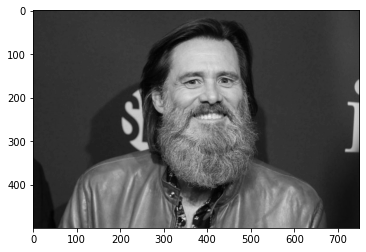

In [2]:
url = 'https://3qbqmv3k0dsayahrd3pw8jru-wpengine.netdna-ssl.com/wp-content/uploads/2019/05/GettyImages-691030296-750x500.jpg'

picture = io.imread(url)
image = cv2.cvtColor(picture, cv2.COLOR_RGB2GRAY)
shape_image = image.shape
print(shape_image)
plt.imshow(image, cmap='gray', vmin = 0, vmax = 255)
plt.show()

In [3]:
height = image.shape[0]
width = image.shape[1]

print(shape_image)
print(height)
print(width)

(500, 750)
500
750


In [4]:
gaussian_filter = (1.0 / 140.0) * np.array([[1, 1, 2, 2, 2, 1, 1],
                                            [1, 2, 2, 4, 2, 2, 1],
                                            [2, 2, 4, 8, 4, 2, 2],
                                            [2, 4, 8, 16, 8, 4, 2],
                                            [2, 2, 4, 8, 4, 2, 2],
                                            [1, 2, 2, 4, 2, 2, 1],
                                            [1, 1, 2, 2, 2, 1, 1]])

x_part = (1.0 / 4.0) * np.array([[-1, 0, 1],
                                   [-2, 0, 2],
                                   [-1, 0, 1]])

y_part = (1.0 / 4.0) * np.array([[1, 2, 1],
                                [0, 0, 0],
                                [-1, -2, -1]])

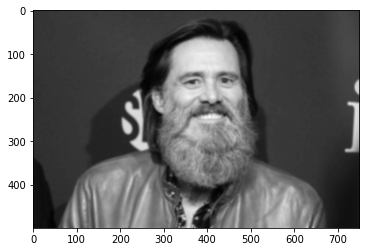

In [5]:
def gaussianSmoothing(image):
    imageArray = np.array(image)
    gaussianArr = np.array(image)
    sum = 0
    total = 0
    for i in range(3, image.shape[0] - 3):
        for j in range(3, image.shape[1] - 3):
            sum = Filter(imageArray, i, j)
            gaussianArr[i][j] = sum
    return gaussianArr

def Filter(image, row, column):
    sum = 0
    for i in range(row - 3, row + 4):
        for j in range(column - 3, column + 4):
            sum += gaussian_filter[i - row + 3][j - column + 3] * image[i][j]
    return sum

gaussianData = gaussianSmoothing(image)
plt.imshow(gaussianData, cmap='gray')
plt.show()

In [6]:
def UnderRegion(imgArr, i, j):
    return imgArr[i][j] == None or imgArr[i][j + 1] == None or imgArr[i][j - 1] == None or imgArr[i + 1][j] == None or \
           imgArr[i + 1][j + 1] == None or imgArr[i + 1][j - 1] == None or imgArr[i - 1][j] == None or \
           imgArr[i - 1][j + 1] == None or imgArr[i - 1][j - 1] == None

def sobelX(image, row, column):
    temp = 0
    H = 0
    for i in range(0, 3):
        for j in range(0, 3):
            temp += image[row + i, column + j] * x_part[i, j]
    return temp

def sobelY(image, row, column):
    sum = 0
    V = 0
    for i in range(0, 3):
        for j in range(0, 3):
            V += image[row + i, column + j] * y_part[i, j]
    return V

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:455: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:460: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:488: RuntimeWarning: invalid value encountered in multiply
  A_resampled *= ((a_max - a_min) / 0.8)


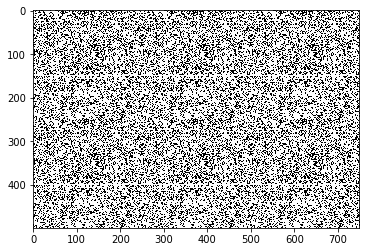

In [7]:
def GradientX(image):
    imageDataX = np.empty(shape=(height, width))
    for i in range(3, height - 5):
        for j in range(3, image[i].size - 5):
            if UnderRegion(image, i, j):
                imageDataX[i + 1][j + 1] = None
            else:
                imageDataX[i + 1][j + 1] = sobelX(image, i, j)

    return abs(imageDataX)

Gx = GradientX(gaussianData)
plt.imshow(Gx, cmap='gray')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:455: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:460: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


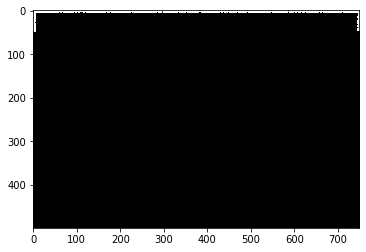

In [8]:
def GradientY(image):
    imageDataY = np.empty(shape=(height, width))
    for i in range(3, height - 5):
        for j in range(3, image[i].size - 5):
            if UnderRegion(image, i, j):
                imageDataY[i + 1][j + 1] = None
            else:
                imageDataY[i + 1][j + 1] = sobelY(image, i, j)
    return abs(imageDataY)

Gy = GradientY(gaussianData)
plt.imshow(Gy, cmap='gray')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars


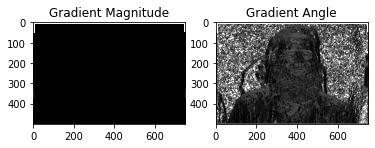

In [9]:
def magnitude(Gx, Gy):
    gradientData = np.empty(shape=(height, width))
    for row in range(height):
        for column in range(width):
            gradientData[row][column] = ((Gx[row][column] ** 2 + Gy[row][column] ** 2) ** 0.5) / 1.4142
    return gradientData


def angle(Gx, Gy,):
    gradientData = np.empty(shape=(height, width))
    angle = 0
    for i in range(height):
        for j in range(width):
            if Gx[i][j] == 0:
                if Gy[i][j] > 0:
                    angle = 90
                else:
                    angle = -90
            else:
                angle = math.degrees(math.atan(Gy[i][j] / Gx[i][j]))
            if angle < 0:
                angle += 360
            gradientData[i][j] = angle
    return gradientData

gradient = magnitude(Gx, Gy)
gradientAngle = angle(Gx, Gy)

plt.subplot(121),plt.imshow(gradient,cmap = 'gray')
plt.title('Gradient Magnitude')
plt.subplot(122),plt.imshow(gradientAngle,cmap = 'gray')
plt.title('Gradient Angle')

plt.show()

In [10]:
def localMaximization(gradientData, gradientAngle):
    gradient = np.empty(shape=(height, width))
    nPixels = np.zeros(shape=(256))
    edgePixels = 0

    for row in range(5, height - 5):
        for col in range(5, image[row].size - 5):
            theta = gradientAngle[row, col]
            gradientAtPixel = gradientData[row, col]
            value = 0

            if (0 <= theta <= 22.5 or 157.5 < theta <= 202.5 or 337.5 < theta <= 360):
                if gradientAtPixel > gradientData[row, col + 1] and gradientAtPixel > gradientData[row, col - 1]:
                    value = gradientAtPixel
                else:
                    value = 0

            elif (22.5 < theta <= 67.5 or 202.5 < theta <= 247.5):
                if gradientAtPixel > gradientData[row + 1, col - 1] and gradientAtPixel > gradientData[
                    row - 1, col + 1]:
                    value = gradientAtPixel
                else:
                    value = 0

            elif (67.5 < theta <= 112.5 or 247.5 < theta <= 292.5):
                if gradientAtPixel > gradientData[row + 1, col] and gradientAtPixel > gradientData[row - 1, col]:
                    value = gradientAtPixel
                else:
                    value = 0

            elif 112.5 < theta <= 157.5 or 292.5 < theta <= 337.5:
                if gradientAtPixel > gradientData[row + 1, col + 1] \
                        and gradientAtPixel > gradientData[row - 1, col - 1]:
                    value = gradientAtPixel
                else:
                    value = 0

            gradient[row, col] = value

            if value > 0:
                edgePixels += 1
                nPixels[int(value)] += 1
    return [gradient, nPixels, edgePixels]

In [11]:
maxSuppressed = localMaximization(gradient, gradientAngle)
suppressedImage = maxSuppressed[0]
nPixels = maxSuppressed[1]
edgePixels = maxSuppressed[2]

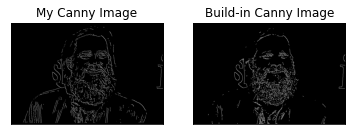

In [12]:
percent = 15
threshold = np.around(edgePixels * percent / 100)
sum = 0
value = 255
myCannyImage = suppressedImage

for value in range(255, 0, -1):
    sum += nPixels[value]
    if sum >= threshold:
        break

for i in range(myCannyImage.shape[0]):
    for j in range(myCannyImage[i].size):
        if myCannyImage[i, j] < value:
            myCannyImage[i, j] = 0
        else:
            myCannyImage[i, j] = 255

cannyEdge_buildFunc = cv2.Canny(image,185,200)

plt.subplot(121),plt.imshow(myCannyImage,cmap = 'gray')
plt.title('My Canny Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cannyEdge_buildFunc,cmap = 'gray')
plt.title('Build-in Canny Image'), plt.xticks([]), plt.yticks([])

plt.show()